In [1]:
%load_ext autoreload
%autoreload 2

# Notebook to test model predictions

In [2]:
from dataloader import AnomalyDataset

ad = AnomalyDataset("all")
turbine_ad = ad.filter_by_component("turbine_blades")

ad

ImportError: cannot import name 'AnomalyDataset' from 'dataloader' (unknown location)

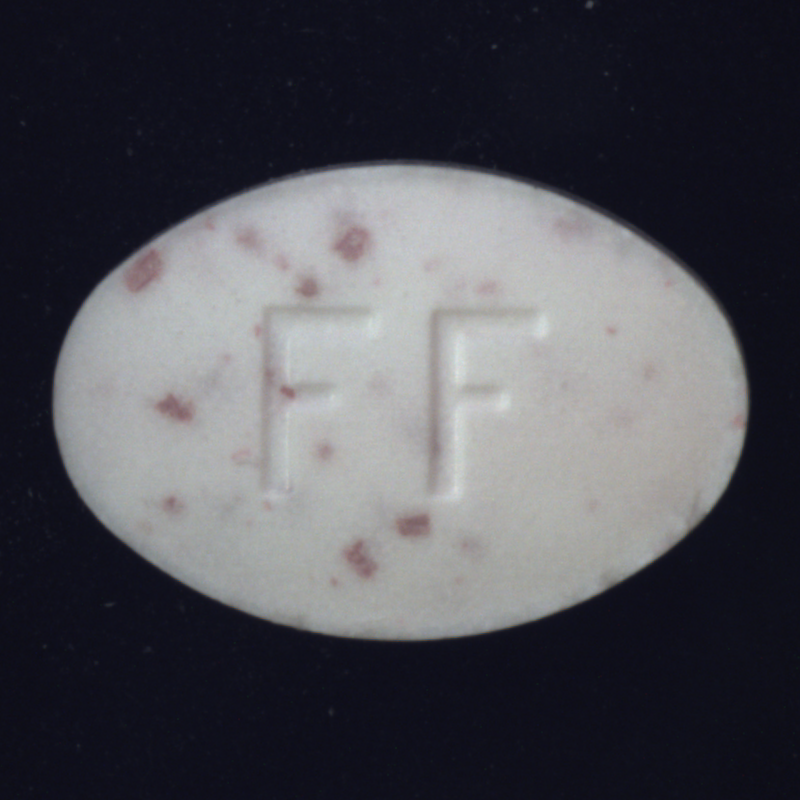

In [ ]:
ad.filter_by_component("pill")[12][0]

### Clip

In [1]:
from aircraft_anomaly_detection.models.clip_predictor import CLIP

predictor = CLIP(class_names=["damaged", "undamaged"], undamaged_idxes=[1])

# Predict all images in a folder

folder_preds = predictor.predict("../data/mvtech/screw/test/good")
print(folder_preds)


[Annotation(image=<PIL.Image.Image image mode=RGB size=1024x1024 at 0x23F363F7B50>, label=True, bboxes=[], scores=[56.2192440032959, 43.78075301647186], bboxes_labels=['damaged', 'undamaged'], mask=None), Annotation(image=<PIL.Image.Image image mode=RGB size=1024x1024 at 0x23F363F7970>, label=True, bboxes=[], scores=[57.75381922721863, 42.24618375301361], bboxes_labels=['damaged', 'undamaged'], mask=None), Annotation(image=<PIL.Image.Image image mode=RGB size=1024x1024 at 0x23F363F60E0>, label=True, bboxes=[], scores=[57.2282612323761, 42.77174472808838], bboxes_labels=['damaged', 'undamaged'], mask=None), Annotation(image=<PIL.Image.Image image mode=RGB size=1024x1024 at 0x23F363F7B80>, label=True, bboxes=[], scores=[52.38604545593262, 47.61395752429962], bboxes_labels=['damaged', 'undamaged'], mask=None), Annotation(image=<PIL.Image.Image image mode=RGB size=1024x1024 at 0x23F37762020>, label=True, bboxes=[], scores=[66.84855818748474, 33.15144181251526], bboxes_labels=['damaged', 'u

1
component='rotors' condition='scratched' ground_truth=None description=''


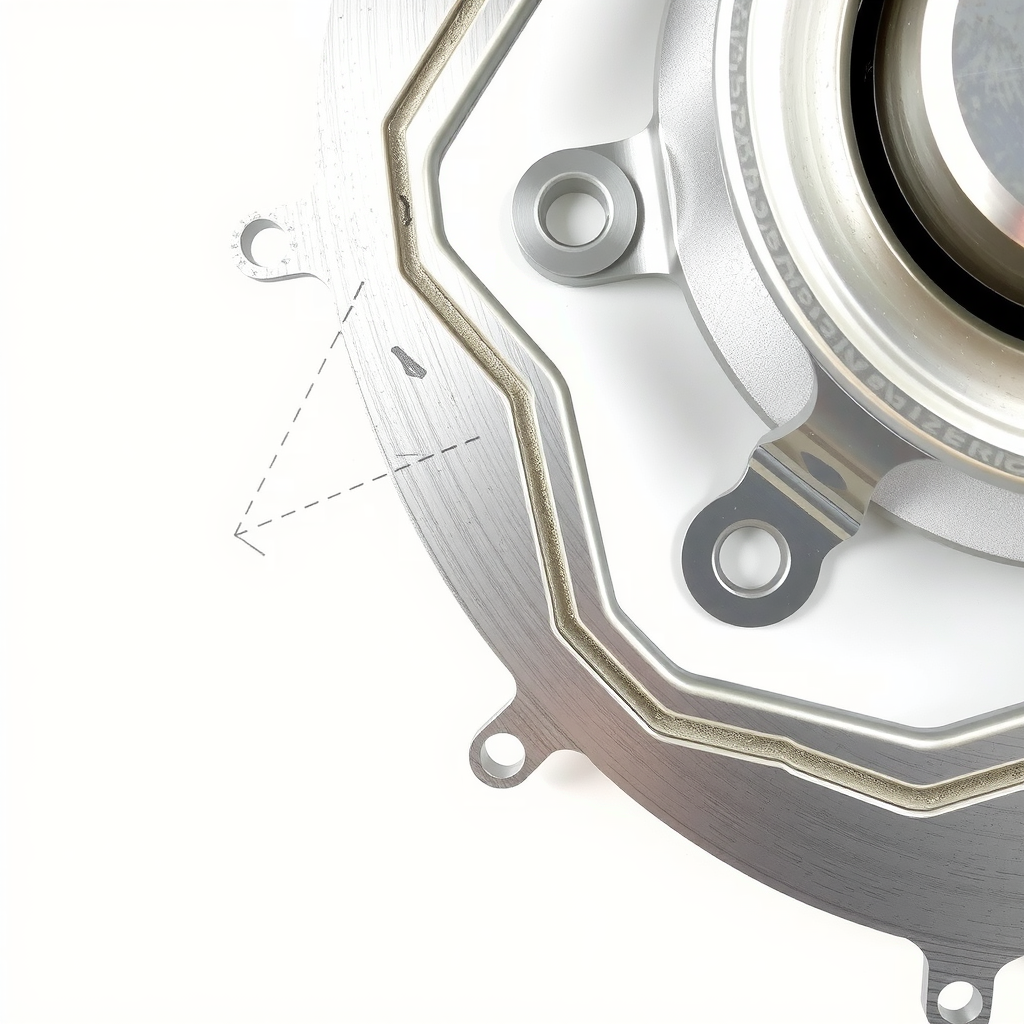

In [6]:
print(label)
print(metadata)
image

In [7]:
predictor.predict_single(
    image,
)  # Predict a single image and class

[{'label': 'undamaged', 'confidence': 86.83},
 {'label': 'damaged', 'confidence': 13.17}]

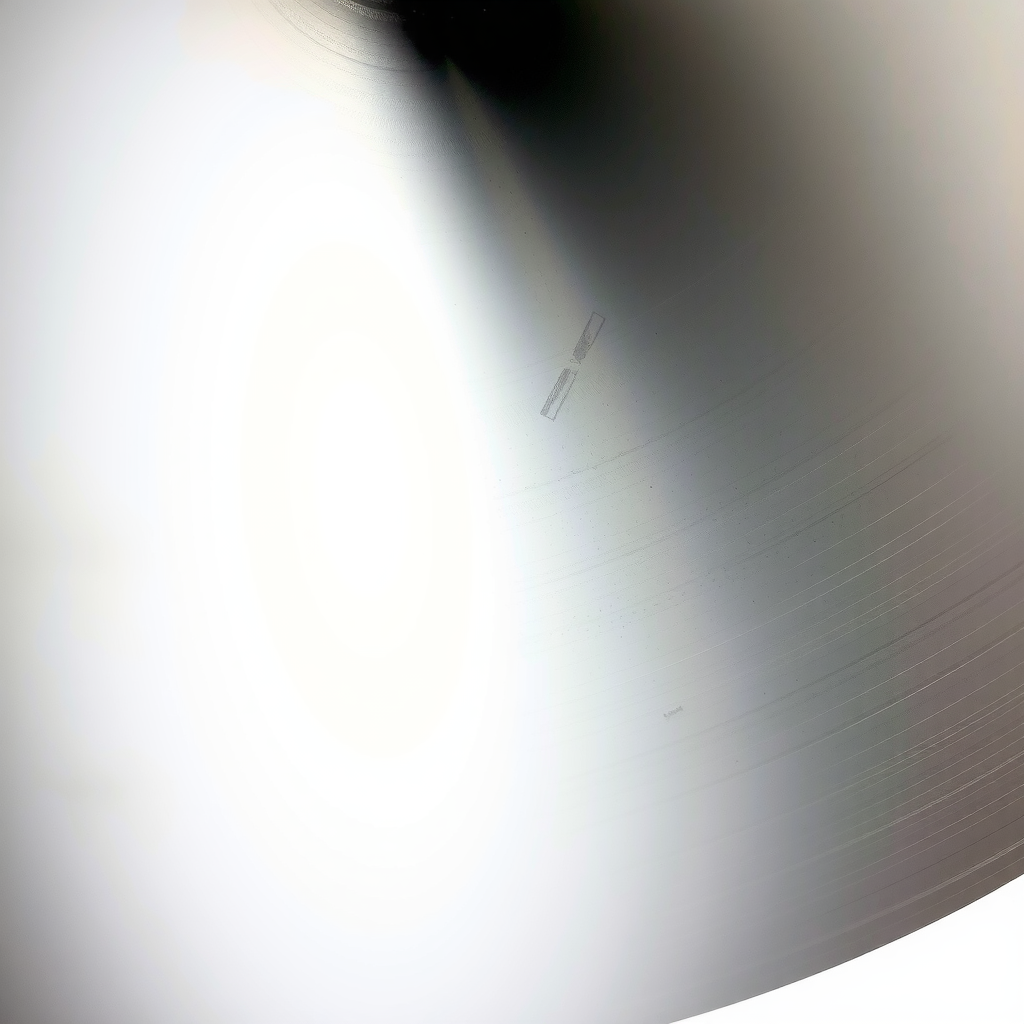

In [9]:
turbine_ad[0][0]

### Grouding Dino + SAM

[0.5984644889831543] ['metal scratch']


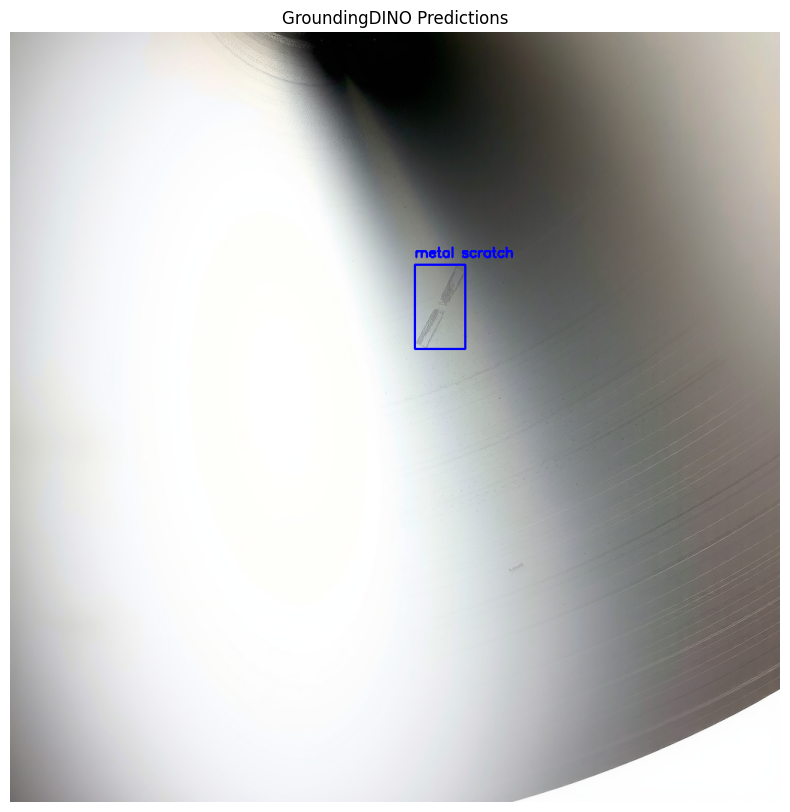

In [18]:
from aircraft_anomaly_detection.models.dino import DINO
from aircraft_anomaly_detection.models.sam import SAM

# image_path = "../data/LTAA-FLUX-Small-test-dataset-generated/Generated/Flux_1.jpg"
image, label, meta = turbine_ad[0]
text_prompt = "metal scratch"


# Init models
dino = DINO()

# DINO prediction
boxes, scores, detected_labels = dino.predict(image_input=image, text_labels=[[text_prompt]])
print(scores, detected_labels)
dino.plot(image, boxes, detected_labels)

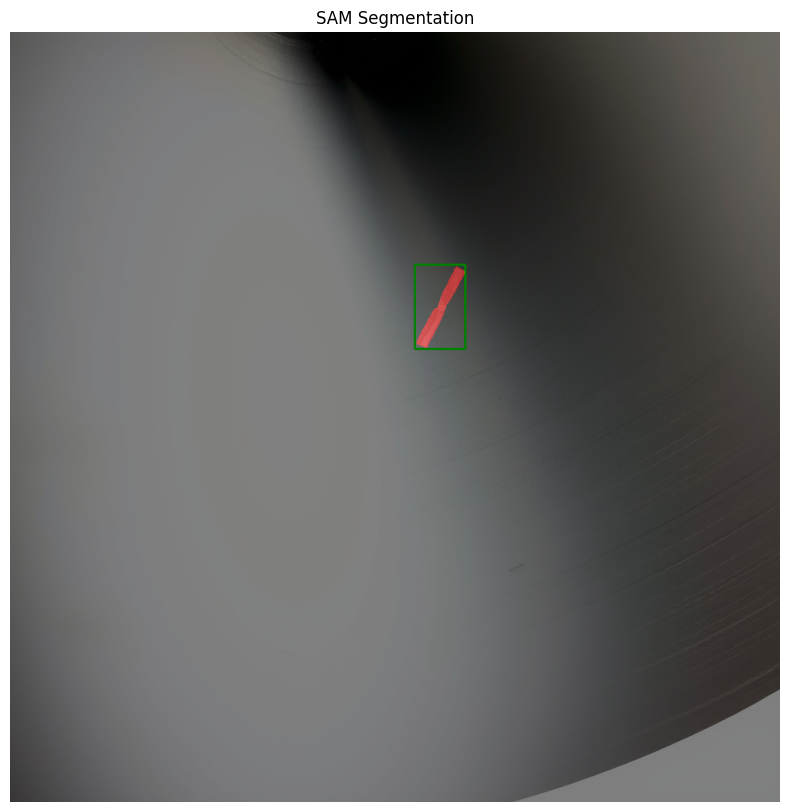

In [22]:
sam = SAM(
    checkpoint_path="../data/weights/sam_vit_h_4b8939.pth",
    model_type="vit_h",
)

masks = sam.predict(image, boxes, filter=False)
sam.plot(image, boxes, masks, filter=False)

### Owlvit

In [ ]:
from aircraft_anomaly_detection.models.owlvit import OwlViT

for i in range(1, 2):
    # image, label, meta = turbine_ad[i]
    image_path = f"../data/LTAA-FLUX-Small-test-dataset-generated/Generated/Flux_{i}.jpg"
    # image_path = "../data/no_defect/detail_jet-engine-part.jpg"
    texts = ["a clean, undamaged metal surface", "a close-up image of a metal scratch"]

    owlvit = OwlViT()
    ann = owlvit.predict(image_input=image_path, text_prompts=texts, undamaged_idxes=[0], top_k=2)

    owlvit.plot(ann)


c:\Users\ronan\miniconda3\envs\cv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No defect found
No defect found


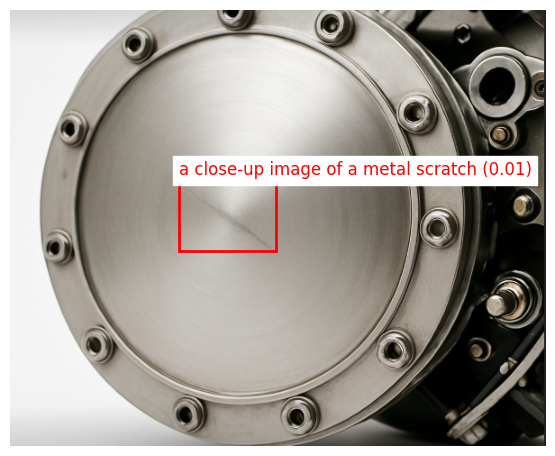

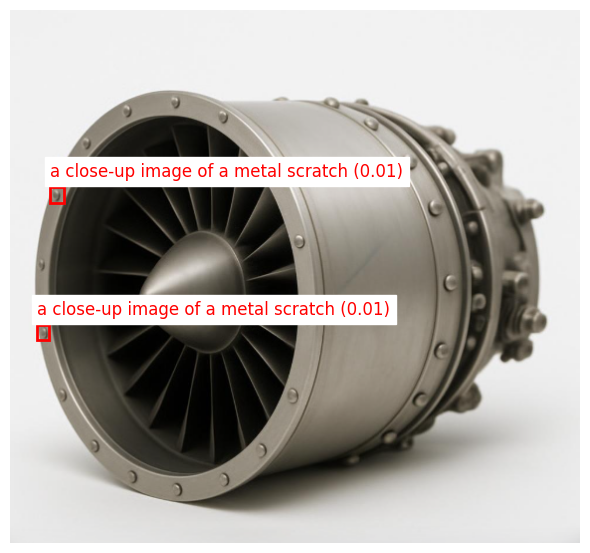

In [ ]:
from aircraft_anomaly_detection.models.owlvit import OwlViT

model_path = "../data/weights/owlvit"

image_path_no_defect = [
    "../data/no_defect/detail_jet-engine-part.jpg",
    "../data/no_defect/gpt_generated.jpg",
    "../data/no_defect/gpt_generated_3.png",
]
texts = ["a clean, undamaged metal surface", "a close-up image of a metal scratch"]

owlvit = OwlViT(model_path)
for image_path in image_path_no_defect:
    image, boxes, scores, labels = owlvit.predict(
        image_path=image_path, text_prompts=texts, undamaged_idxes=[0], top_k=2
    )

    owlvit.plot(image, texts, boxes, labels, scores)

### Gemini


In [ ]:
from aircraft_anomaly_detection.models.gemini import GeminiVision



api_key = "" # put your gemini api key here

gemini_vision = GeminiVision(api_key=api_key)

image_path = "../data/Synthetic_anomaly_dataset/oil_pump/scratched/img_15.png"

prompt = "Tell me if there are any scratches in the image. Give only a yes or no answer."

response = gemini_vision.generate_with_image_and_prompt(image_path, prompt)
print(response)



No.
